# ToC

- Introduction
- Context and Glossary
- Dataset Features
- Response Variable
- Goals and Objectives
- Data Preprocessing
    - Data Retrieval
    - Data Cleaning
    - Random Sampling
- Data Visualization
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
- Summary and Conclusion

## Current Potential Algorithms:

- Logistic Regression
- Decision Trees

# No need to split data, already training and testing data

- ID - Unique Number to represent patient
- PRG - Plasma Glucose
- PL - Blood Work Result-1 (mu U/mL)
- PR - Blood pressure (mm Hg)
- SK - Blood Work Result-2 (mm)
- TS - Blood Work Result-3 (mu U/mL)
- M11 - Body Max Index (BMI) (kg/(height in m)^2)
- BD2 - Blood Work Result - 4 (mu U/mL)
- Age - Patients Age
- Insurance - If a patient holds an insurance card
- Sepssis - Positive if a patient in ICU will develop sepsis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Patients_Files_Train.csv', delimiter=',')
testing_data = pd.read_csv('Patients_Files_Test.csv', delimiter=',')

# Introduction

Intensive Care Units (ICUs) are constantly challenged to monitor their patients for the risk of sepsis development (an infection that can accrue while staying in ICU). While this challenge has been around for many years, the recent  COVID-19  pandemic  has increased its prominence. For an ICU, the ability to predict if a patient in ICU will 
develop a sepsis is very beneficial. That would assist with reducing the risk of health complications, and managing the ICU resources (such as bed availability, etc.). In this assignment, you will develop a ML model to predict if a patient will develop sepsis in the period of their stay in the ICU, based on provided attributes (features) related to: patient characteristics, diagnoses, treatments, services, hospital charges and patients socio-economic background. 

# Dataset Details
- ID - Unique Number to represent patient
- PRG - Plasma Glucose
- PL - Blood Work Result-1 (mu U/mL)
- PR - Blood pressure (mm Hg)
- SK - Blood Work Result-2 (mm)
- TS - Blood Work Result-3 (mu U/mL)
- M11 - Body Max Index (BMI) (kg/(height in m)^2)
- BD2 - Blood Work Result - 4 (mu U/mL)
- Age - Patients Age
- Insurance - If a patient holds an insurance card
- Sepssis - Positive if a patient in ICU will develop sepsis

# Target Response Variable

This project aims to uncover the dataset feature `Sepssis`, observing what roles contribute the most significant role in determining the result of an individual's posibility to have Sepsis.

# Goals and Objectives

A proper approach to examining and evaluating the target variable will be defined using several types of data analysis and performance analysis.

The end-goal is to become familiar with a machine learning paradigm, determining from the given approaches, which model is most suitable for the task (minimum 3 approaches).

Generate an evaluation framework, including selecting appropriate performance measures and determining how to split the data.

With the established model, analysis of such and determining results using appropriate techniques to explore the adequacy of the algorithm in performing the task in real world circumstances, including it's limitations.

# Restrictions

"You may analyze the importance of the features based on data analysis, but please note if 
feature removal is not justified then you will not be able to complete the assignment 
correctly and will lose mark. That is, your models should have all features (attributes) as 
input (except the “ID” and “insurance” fields, which are not related to patients’ 
condition and therefore are not attributes). 
You are only allowed to use  techniques  taught  in  class  up  to  week  5  (inclusive) 
for this assignment. That is, you are NOT allowed to use ML techniques such as: Neural 
networks or SVM for this task."

# Data Preprocessing

We will begin data preprocessing for the training set of data by exploring if there exists data quality issues. These include factors such as:
- Missing values
- Irregular cardinality
- Outliers

In [2]:
# training_data.head()
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no missing values given in the dataset.

# Check for data types

In [3]:
print(f"Shape of the dataset = {df.shape} \n")
df.head()

Shape of the dataset = (599, 11) 



,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The ID column can be dropped, as it reflects an ID-Like column. The data is unique for each entry within that column, an will serve no meaningful effect in generating and evaluating a machine learning algorithm.

The target variable `Sepssis` is likewise, a binary data type ("Positive" or "Negative"). Hence, we will re-encode it to suit a binary variable where:
- 1 = "Positive"
- 0 = "Negative

In [5]:
print("Dropping the ID column.")
df = df.drop(['ID'], axis=1)

Dropping the ID column.


In [6]:
print("Re-encoding the Sepssis variable to boolean values 1 and 0.")

df['Sepssis'] = df['Sepssis'].replace(["Positive", "Negative"], [1, 0])

# df.loc[df["Sepssis"] == "Positive", "Sepssis"] = 1
# df.loc[df["Sepssis"] == "Negative", "Sepssis"] = 0

df['Sepssis'] = df['Sepssis'].astype(int)
df['Insurance'] = df['Insurance'].astype(int)

Re-encoding the Sepssis variable to boolean values 1 and 0.


In [7]:
print(df.dtypes)

PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int32
Sepssis        int32
dtype: object


In [8]:
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


All variables to be used in generating the machine learning algorithm are now in an appropiate data type. Sampling will be ignored for this dataframe, as there is not a significantly large amount of entries within the dataframe.

# Data Visualization and Data Analysis

We will use univariate, bivariate and multivariate visualization techniques to explore some relations between certain variables possess with each other.

## Univariate Data Analysis

In [12]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

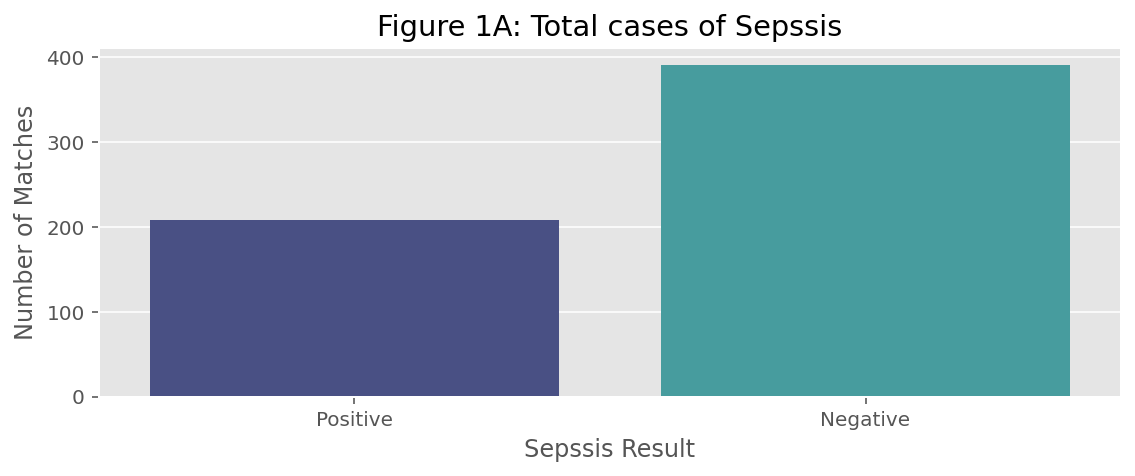

65.28% Of all total cases have NOT contracted Sepssis. 
Conversely, 34.72% of the given total cases have contracted Sepssis during their hospital stay.


In [13]:
figure1_df = df.copy()
figure1_df.loc[figure1_df["Sepssis"] == 1, "Sepssis"] = "Positive"
figure1_df.loc[figure1_df["Sepssis"] == 0, "Sepssis"] = "Negative"

plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
ax = sns.countplot(x='Sepssis', data=figure1_df, palette='mako')
plt.xlabel('Sepssis Result')
plt.ylabel('Number of Matches')
plt.title('Figure 1A: Total cases of Sepssis')

plt.tight_layout()
plt.show()

total_percentage = round((df[df["Sepssis"] == 0].shape[0] / df["Sepssis"].shape[0]) * 100, 2)
print(f"{total_percentage}% Of all total cases have NOT contracted Sepssis. \nConversely, {100 - total_percentage}% of the given total cases have contracted Sepssis during their hospital stay.")

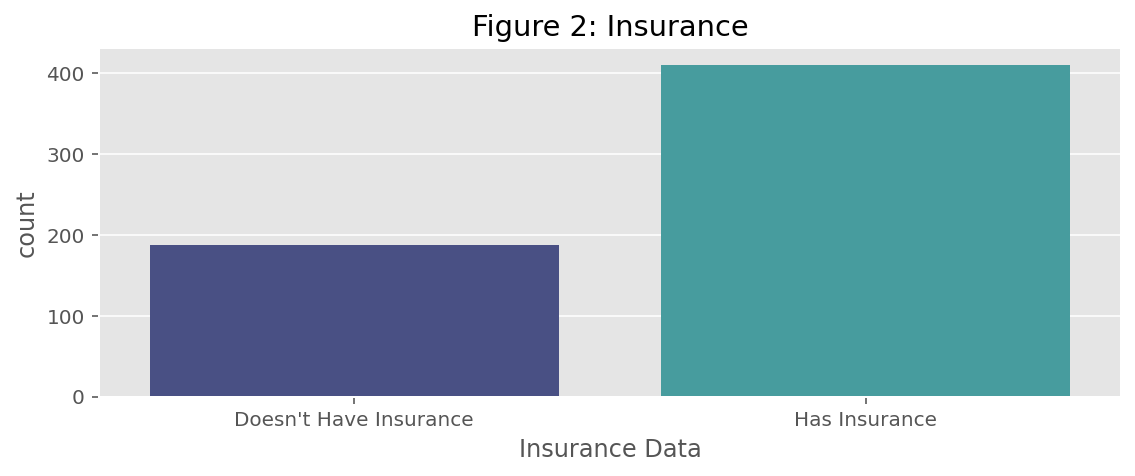

31.39% Of the sample size has insurance. 
Conversely, 68.61% of the given total cases have does NOT have insurance.


In [14]:
figure2_df = df.copy()
figure2_df.loc[figure1_df["Insurance"] == 1, "Insurance"] = "Has Insurance"
figure2_df.loc[figure1_df["Insurance"] == 0, "Insurance"] = "Doesn't Have Insurance"

plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
ax = sns.countplot(x='Insurance', data=figure2_df, palette='mako')
plt.xlabel('Insurance Data')
plt.title('Figure 2: Insurance')

plt.tight_layout()
plt.show()

total_percentage = round((df[df["Insurance"] == 0].shape[0] / df["Insurance"].shape[0]) * 100, 2)
print(f"{total_percentage}% Of the sample size has insurance. \nConversely, {100 - total_percentage}% of the given total cases have does NOT have insurance.")

We can infer from figures 1 and 2 of a similar relationship between `Sepssis`, our target variable, and `Insurance`. With relatively similar percentages, there suggests to be a relation that user's who DO NOT have insurance may possess a higher possibility to contracting Sepsis.

Further analysis of such however will be explored in bivariate and multi-variate data analysis.

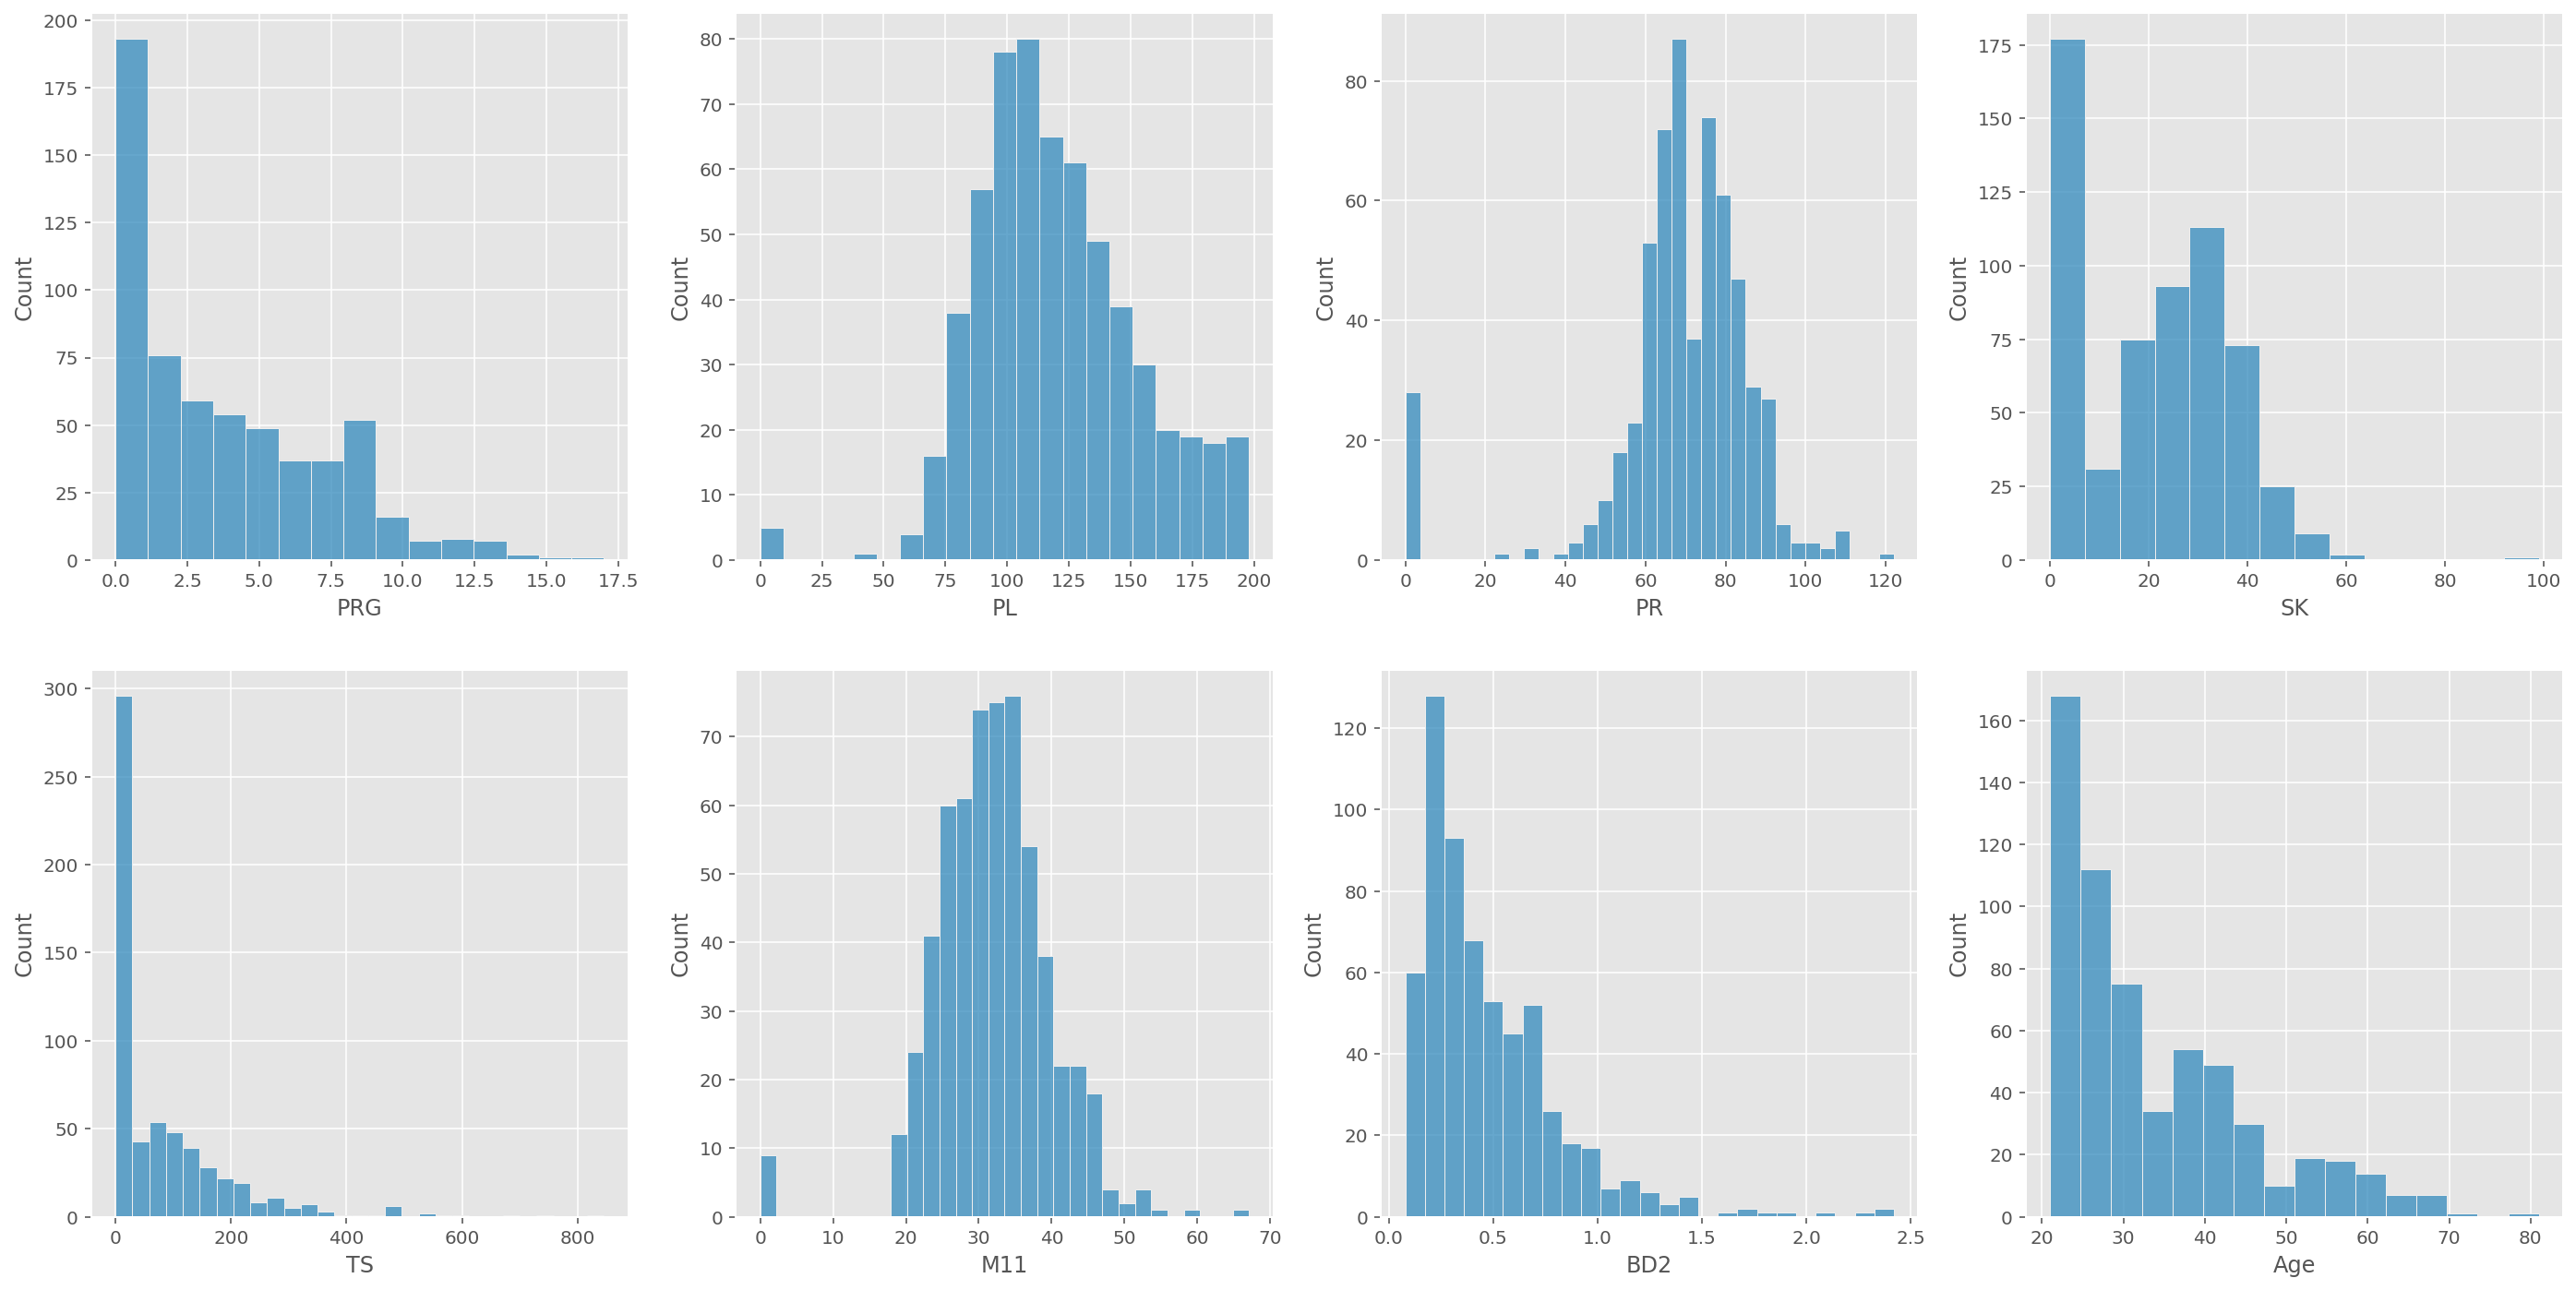

In [15]:
figure3_df = df.copy()
# cols = [i for i in list(df.columns) if i not in ['Insurance','Sepssis']]
figure3_df = figure3_df.drop(['Insurance'], axis=1)
figure3_df = figure3_df.drop(['Sepssis'], axis=1)
# figure2_df.groupby()

# print(cols)
fig, ax = plt.subplots(2, 4, figsize=(24,12))

for i, col in enumerate(figure3_df.columns):
    plt.subplot(2,4,i+1)
    ax = sns.histplot(figure3_df[col], palette='mako')

plt.show()

Figure 2 displays some clear trends, evident of skewing in certain variables and symmetry in others.

## Bivariate Data Analysis

We will firstly compare between the two boolean values within the dataframe: `Sepssis` and `Insurance`.

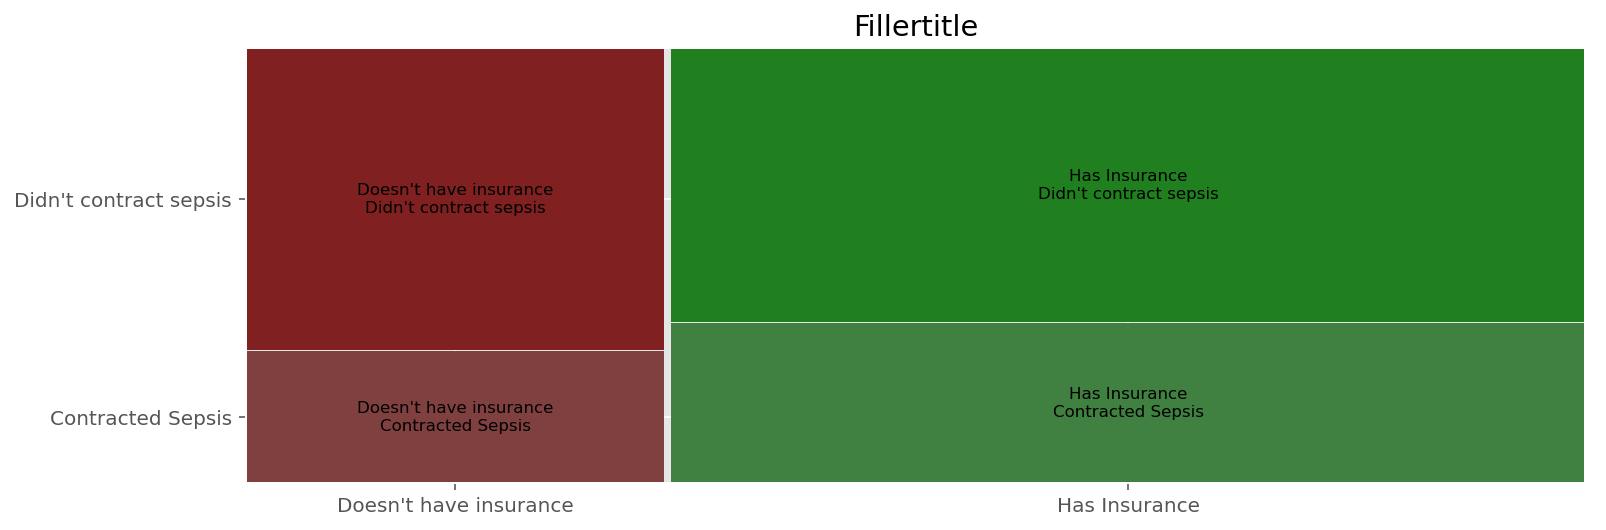

Insurance + No Sepsis = 260
Insurance + Sepsis = 151
No Insurance + No Sepsis = 131
No Insurance + Sepsis = 57
Total: 599


In [16]:
from statsmodels.graphics.mosaicplot import mosaic
figure4_df = df.copy()

figure4_df['Sepssis'] = figure4_df['Sepssis'].replace([1, 0], ["Contracted Sepsis", "Didn't contract sepsis"])
figure4_df['Insurance'] = figure4_df['Insurance'].replace([1, 0], ["Has Insurance", "Doesn't have insurance"])

fig, ax = plt.subplots(figsize=(12, 4))
mosaic(figure4_df, ['Insurance', 'Sepssis'], ax=ax, title='Fillertitle')
plt.show()

v3 = df.query('Insurance == 1 & Sepssis == 0')
v4 = df.query('Insurance == 1 & Sepssis == 1')
v5 = df.query('Insurance == 0 & Sepssis == 0')
v6 = df.query('Insurance == 0 & Sepssis == 1')

v3 = v3.shape[0]
v4 = v4.shape[0]
v5 = v5.shape[0]
v6 = v6.shape[0]

print(f"Insurance + No Sepsis = {v3}")
print(f"Insurance + Sepsis = {v4}")
print(f"No Insurance + No Sepsis = {v5}")
print(f"No Insurance + Sepsis = {v6}")

print("Total:", v3 + v4 + v5 + v6)

Evidently in the above figure, there is a correlation where higher chance of any given individual with insurance to NOT contract sepsis during their hospital stay. However, it is not a strong one, as there still exists the result given in the figure that an individual with insurance and contracts sepsis still has a higher frequency than the latter; no insurance and contracting sepsis.

This can furtherly be represented in a pie chart:

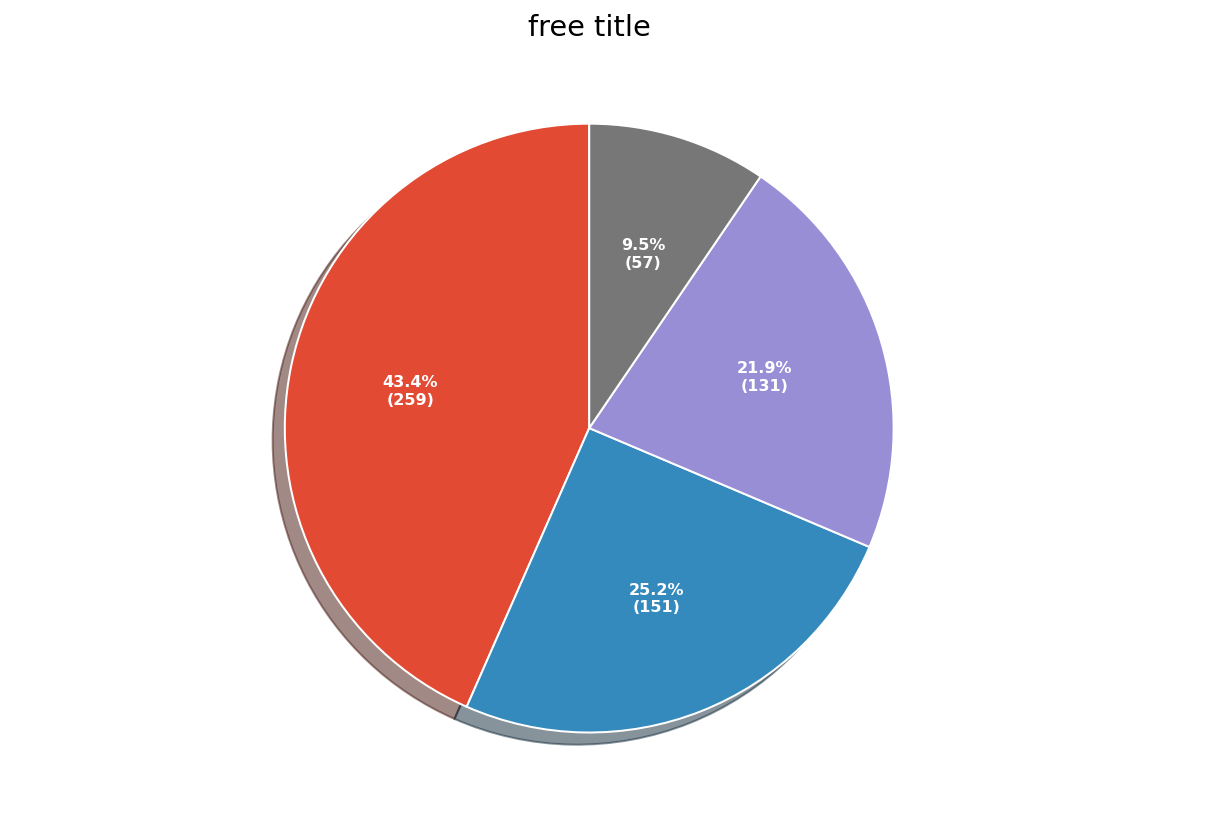

In [17]:
data = [v3, v4, v5, v6]
data_titles = ["Insurance and No Sepsis", "Insurance and Sepsis", "No Insurance and No Sepsis", "No Insurance and Sepsis"]

wp = { 'linewidth' : 1, 'edgecolor' : "white" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = data_titles,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("free title")

plt.show()

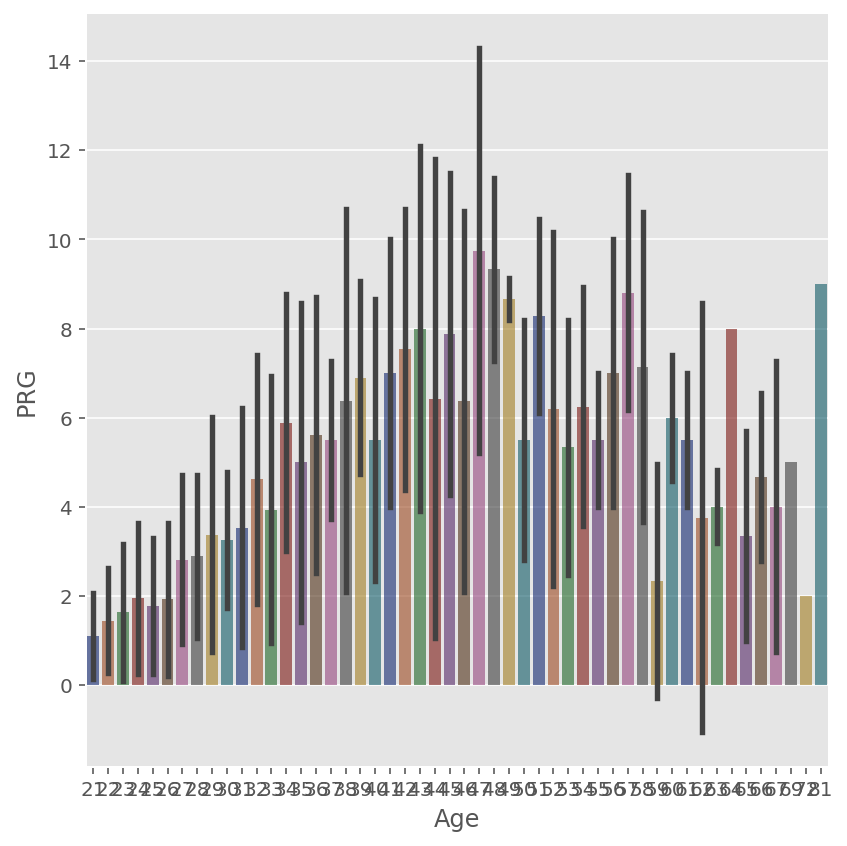

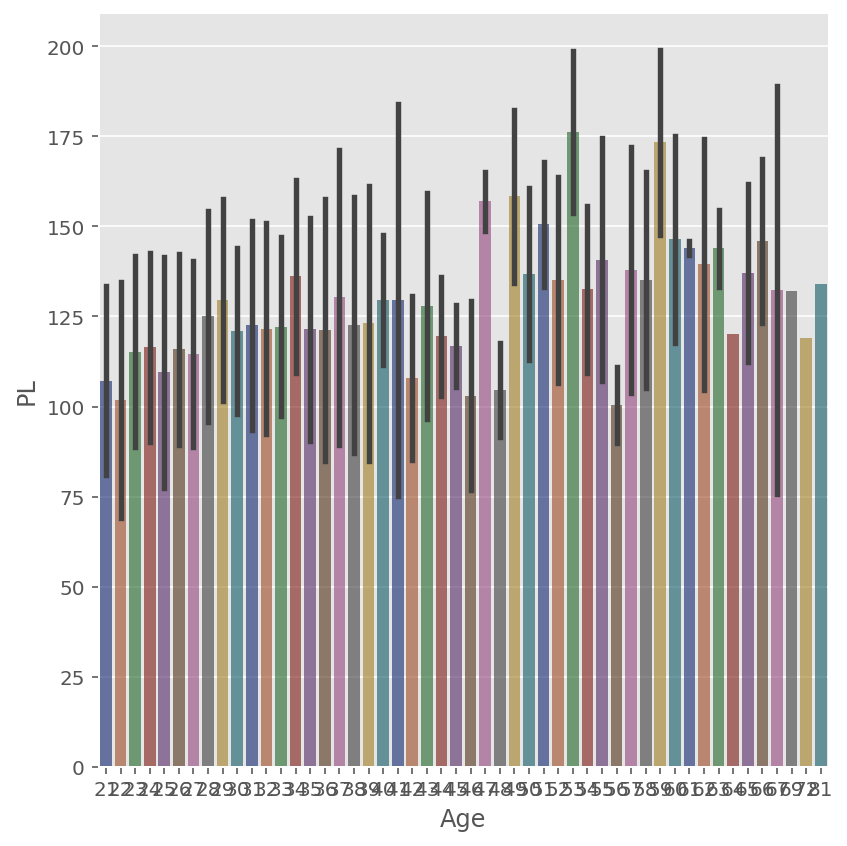

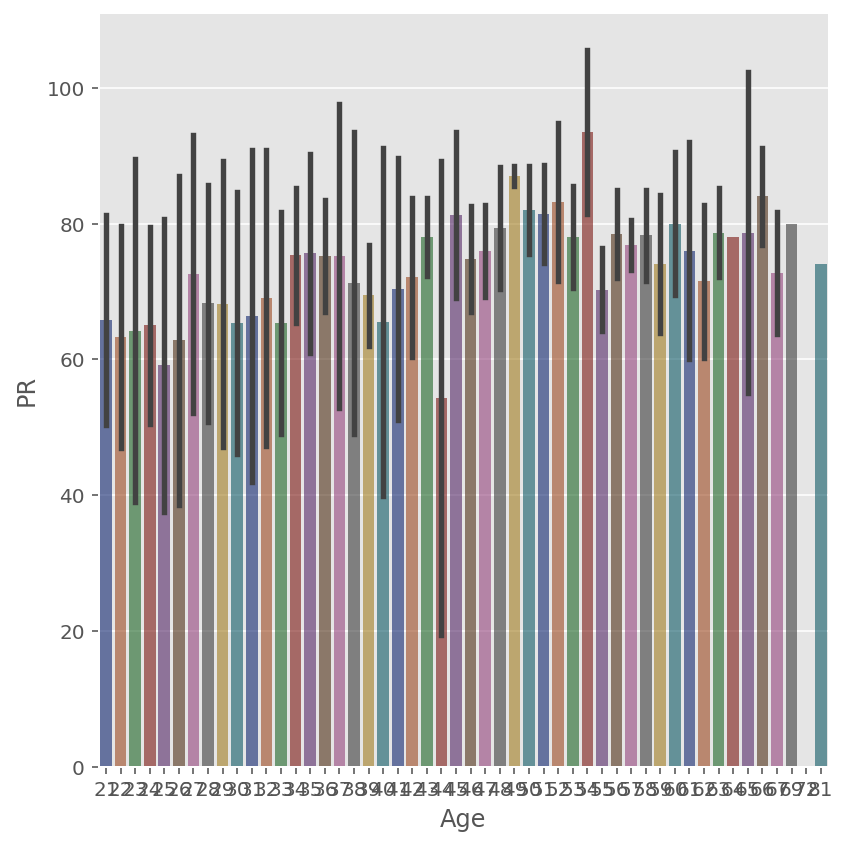

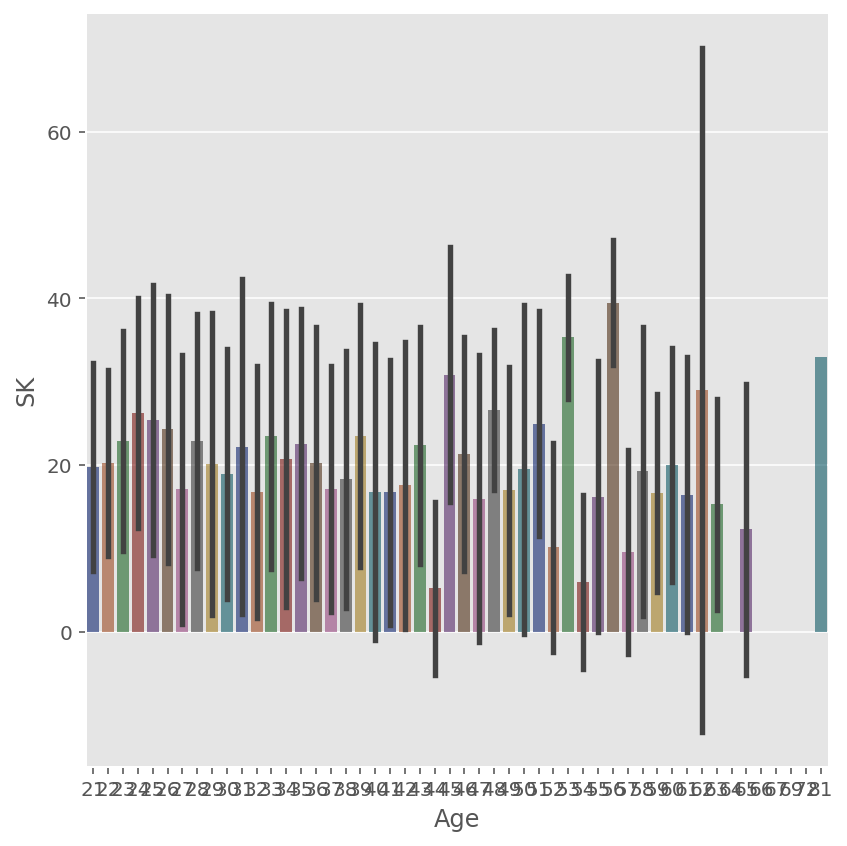

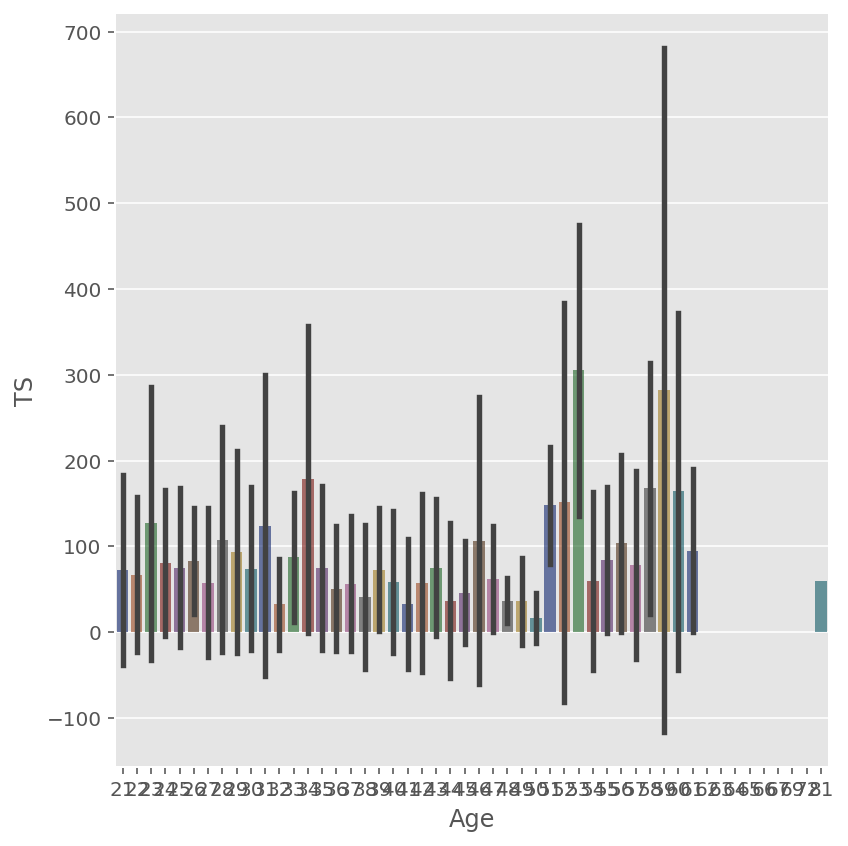

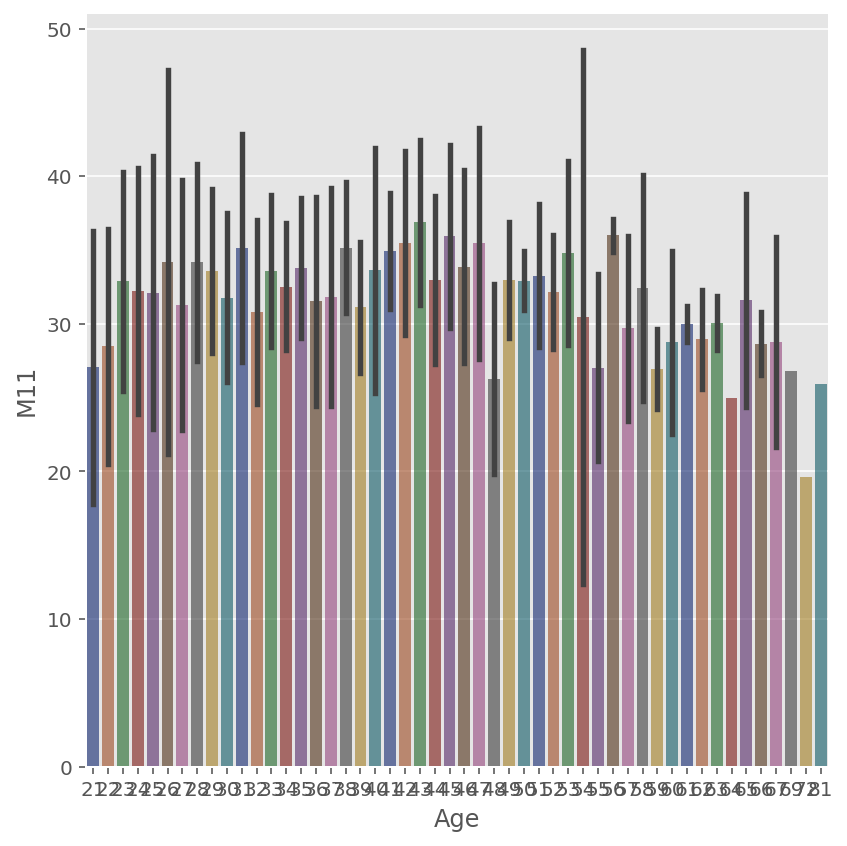

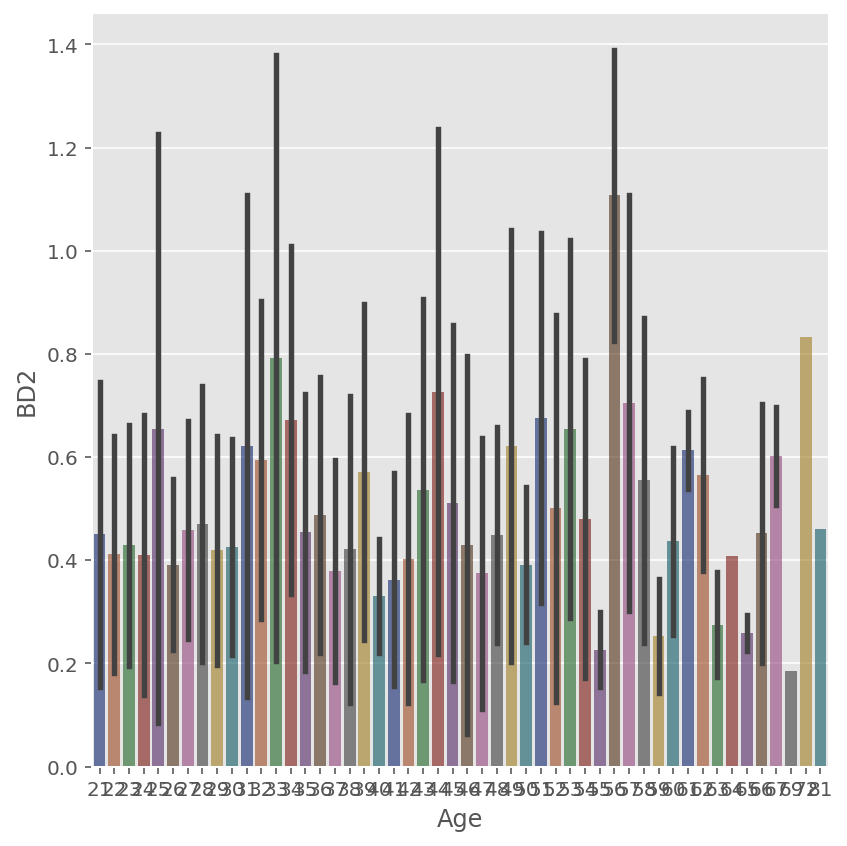

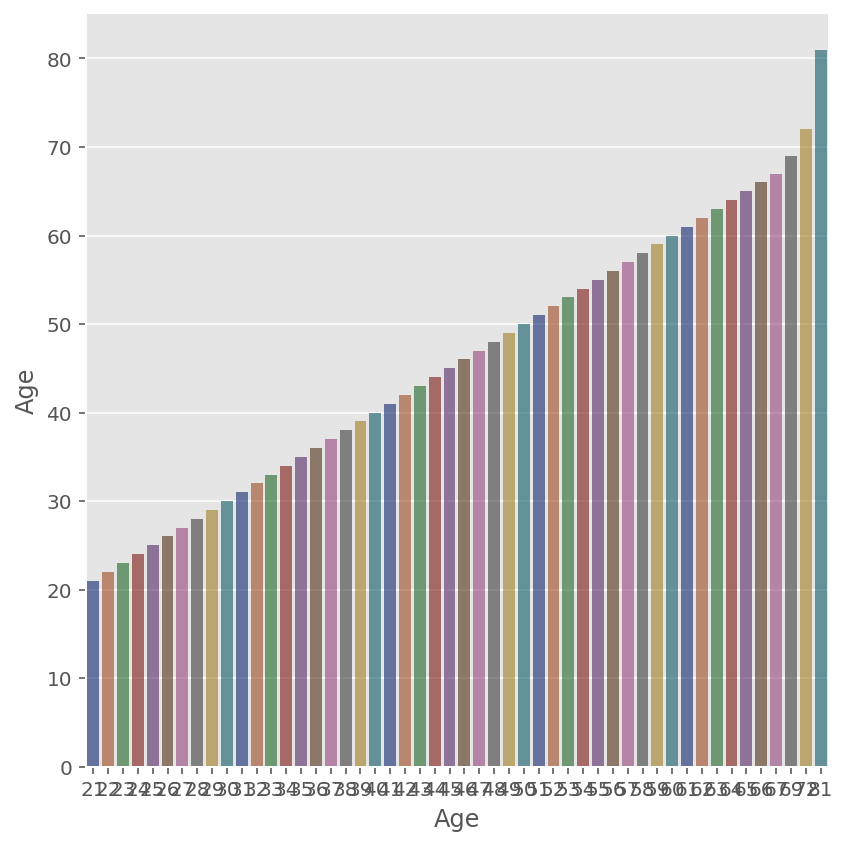

In [68]:
figure5_df = df.copy()
figure5_df = figure5_df.drop(['Insurance', 'Sepssis'], axis=1)

for i, col in enumerate(figure5_df.columns):

    g = sns.catplot(
        data=figure5_df, kind="bar",
        x="Age", y=col,
        ci="sd", palette="dark", alpha=.6, height=6)
#     g.despine(left=True)

plt.show()